# Question #1

Please complete the code blocks marked with "TODO" from T1 to T8.

## Import packages and datasets

The file 'students.csv' contains information about the students, including their student ID, major, academic year, and email address.
* **sid**: student ID
* **major**:  major
* **year**: academic year
* **email**: email address

The files 'classA.csv', 'classB.csv', and 'classC.csv' contain the student IDs registered in each classroom, as well as their total scores and the number of hours they spent studying the subject.

* **sid**: student ID
* **study**: study time in hours

In [104]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

path_data = "https://raw.githubusercontent.com/mlee-pnu/IDS/main/HW2/"

students = pd.read_csv(path_data + 'students.csv')
scores_A = pd.read_csv(path_data + 'classA.csv')
scores_B = pd.read_csv(path_data + 'classB.csv')
scores_C = pd.read_csv(path_data + 'classC.csv')

In [105]:
students

,sid,major,year,email
0,202060001,CSE,2,202060001@naver.com
1,202260002,CSE,2,202260002@naver.com
2,202260003,CSE,2,202260003@gmail.com
3,202160004,CSE,2,202160004@naver.com
4,202260005,CSE,2,202260005@naver.com
...,...,...,...,...
134,201762033,ECE,4,201762033@naver.com
135,201962034,ECE,3,201962034@naver.com
136,201862035,ECE,4,201862035@naver.com
137,201862036,ECE,3,201862036@naver.com


In [106]:
scores_A.head()

,sid,score,study
0,202060001,46.274451,9.70
1,202260002,39.669772,12.40
2,202260003,47.743211,14.82
3,202160004,27.737961,6.64
4,202260005,10.780187,6.56


Initially, you want to count the number of students for each major.

In [107]:
pd.unique(students['major'])

array(['CSE', 'ARCH', 'BIO', 'NAOE', 'ECE', 'GS', 'GEO', 'CBE', 'BIZ',
       'PHYS'], dtype=object)

In [108]:
majors = students.groupby('major').size().reset_index(name = 'count')
majors

,major,count
0,ARCH,1
1,BIO,1
2,BIZ,1
3,CBE,1
4,CSE,91
5,ECE,38
6,GEO,1
7,GS,1
8,NAOE,3
9,PHYS,1


## T1. Define a function and applying to a column
You are planning to implement a function that will be applied to each element of the 'major' column. This function will convert the major name to 'Other' if the major is not CSE or ECE.


In [109]:
# TODO: complete the following code block
def renameMajor(_major):
  if not((_major == "CSE") or (_major == "ECE")):
    _major = "Other"
    return _major
  else:
    return _major

In [110]:
# TODO: apply the function to the column 'major'
students['major'] = students['major'].apply(renameMajor)
students.groupby('major').size().reset_index(name = 'count')

,major,count
0,CSE,91
1,ECE,38
2,Other,10


## T2. Applying arithmetic to a column
Oops, a teaching assistant from class B reported that they forgot to include the attendance score. Fortunately, all the students in class B received a score of 5 for attendance, which is the maximum score. Please revise the scores for class B.

In [111]:
# TODO: add 5 points to socres of class B
scores_B['score']
scores_B['score'] += 5

## T3. Joining Tables by Columns


First, you need to concatenate the scores of all the classes.

In [112]:
# add an additional column to indicate the class division
scores_A['div'] = 'Class_A'
scores_B['div'] = 'Class_B'
scores_C['div'] = 'Class_C'

# concatenate three tables. Note that those tables consist of the same columns
scores = pd.concat([scores_A, scores_B, scores_C])
scores

,sid,score,study,div
0,202060001,46.274451,9.70,Class_A
1,202260002,39.669772,12.40,Class_A
2,202260003,47.743211,14.82,Class_A
3,202160004,27.737961,6.64,Class_A
4,202260005,10.780187,6.56,Class_A
...,...,...,...,...
32,201762033,78.310276,19.64,Class_C
33,201962034,58.429588,17.94,Class_C
34,201862035,50.774370,20.08,Class_C
35,201862036,71.981646,15.06,Class_C


Now, you want to join the two tables using the shared column 'sid'.

In [113]:
# TODO: Join the two tables, scores and students
total = students.join(scores.set_index(['sid']), on=['sid'])
total

,sid,major,year,email,score,study,div
0,202060001,CSE,2,202060001@naver.com,46.274451,9.70,Class_A
1,202260002,CSE,2,202260002@naver.com,39.669772,12.40,Class_A
2,202260003,CSE,2,202260003@gmail.com,47.743211,14.82,Class_A
3,202160004,CSE,2,202160004@naver.com,27.737961,6.64,Class_A
4,202260005,CSE,2,202260005@naver.com,10.780187,6.56,Class_A
...,...,...,...,...,...,...,...
134,201762033,ECE,4,201762033@naver.com,78.310276,19.64,Class_C
135,201962034,ECE,3,201962034@naver.com,58.429588,17.94,Class_C
136,201862035,ECE,4,201862035@naver.com,50.774370,20.08,Class_C
137,201862036,ECE,3,201862036@naver.com,71.981646,15.06,Class_C


## T4. Draw a histogram

In [114]:
# Check the range
max(total['score']), min(total['score'])

(96.26000935, 6.056183983)

To visualize the distribution of the scores, you have decided to create a histogram with 10 equally-sized bins ranging from 0 to 100 points.

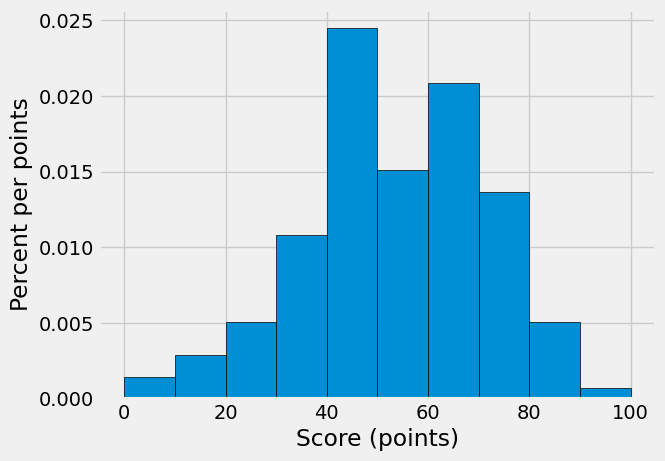

In [126]:
# TODO: draw a histogram with density scale
hist_total = total.hist('score', bins=range(0, 101, 10), density = True, edgecolor='black')
plots.xlabel('Score (points)')
plots.ylabel('Percent per points')
plots.title('')
plots.show()

Can you tell how many students fall into the bin ranging [50, 60)?

In [116]:
0.015 * 10 * len(total['score'])

20.849999999999998

In [117]:
len(total[ (50<=total['score']) & (total['score']<60)])

21

## T5. Adding a grade column

In [118]:
# Check the cutoff scores for the top 25%, 50%, 75% of scores.
np.quantile(total['score'], [0.75, 0.5, 0.25])

array([68.73141863, 52.32727968, 41.65061315])

Based on the scores obtained, you have decided to assign grades generously as follows:

- A: [68, 100]
- B: [52, 68)
- C: [41, 52)
- D: [0, 41)



In [119]:
# TODO: Please add a new column named 'grade' and assign the grades based on the criteria provided above.
total['grade'] = pd.cut(total['score'], bins=[0, 41, 52, 68, 100], labels=['D', 'C', 'B', 'A'])

In [120]:
total

,sid,major,year,email,score,study,div,grade
0,202060001,CSE,2,202060001@naver.com,46.274451,9.70,Class_A,C
1,202260002,CSE,2,202260002@naver.com,39.669772,12.40,Class_A,D
2,202260003,CSE,2,202260003@gmail.com,47.743211,14.82,Class_A,C
3,202160004,CSE,2,202160004@naver.com,27.737961,6.64,Class_A,D
4,202260005,CSE,2,202260005@naver.com,10.780187,6.56,Class_A,D
...,...,...,...,...,...,...,...,...
134,201762033,ECE,4,201762033@naver.com,78.310276,19.64,Class_C,A
135,201962034,ECE,3,201962034@naver.com,58.429588,17.94,Class_C,B
136,201862035,ECE,4,201862035@naver.com,50.774370,20.08,Class_C,C
137,201862036,ECE,3,201862036@naver.com,71.981646,15.06,Class_C,A


Now you want to check the distribution of grades. 

In [121]:
grades = total.groupby('grade').size().reset_index(name = 'count')
grades.sort_values('grade', ascending=False).reset_index(drop=True)

,grade,count
0,A,36
1,B,35
2,C,35
3,D,33


## T6. The mean score for each academic year

Calculate the mean score for each academic year using the 'groupby' method.

In [122]:
# TODO: 
mean_score = total.groupby('year').mean(numeric_only=True)['score'].reset_index(name='mean_score')
mean_score

,year,mean_score
0,1,55.662441
1,2,54.612547
2,3,54.483818
3,4,50.842452


## T7. Generate a pivot table
Now you want to see the distribution of the grades by class division. 

In [123]:
# select only required
division_and_grade = total[['sid','div','grade']]
division_and_grade.head()

,sid,div,grade
0,202060001,Class_A,C
1,202260002,Class_A,D
2,202260003,Class_A,C
3,202160004,Class_A,D
4,202260005,Class_A,D


In [124]:
# TODO: generate pivot table using pd.pivot_table
# Use 'grade' as index and 'div' as column
division_and_grade.pivot_table(index='grade', columns='div', values='sid', aggfunc='count').sort_values(by='grade', ascending=False)

div,Class_A,Class_B,Class_C
grade,,,
A,9,8,19
B,13,8,14
C,19,13,3
D,12,20,1


## T8. Drawing a scatter plot

Our dataset, 'total', contains study hours along with the score. Draw a scatter plot to see an association between the two variables.

<Axes: xlabel='Study Time[hours]', ylabel='Score'>

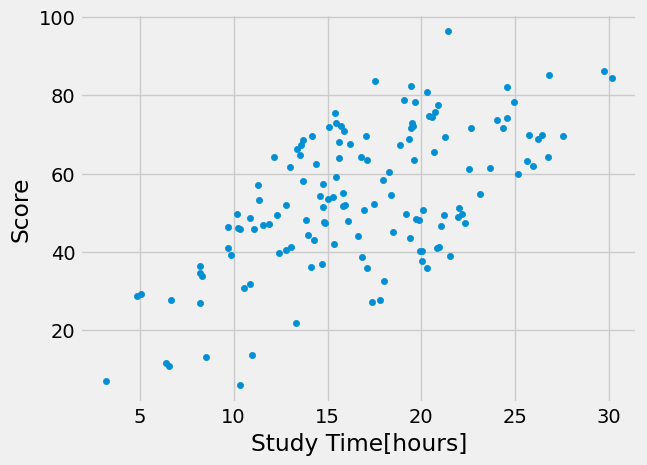

In [125]:
# TODO: Draw a scatter plot to see the relation between study time and scores
total.plot(kind='scatter', x='study', y='score', xlabel='Study Time[hours]', ylabel='Score')

Let's assume that the scatter plot shows a moderate positive correlation between study time and score.

Does this mean that spending more time studying the subject will result in a higher score?

Ask yourself whether the data we've explored so far were collected from a randomized controlled experiment.
